# Predicting the Coordinates of a Single Pixel Using Deep Learning

**Submitted By:** Hina Hanan  
**Date:** 20-Jan-2026  

## Problem Statement

We are given a 50x50 grayscale image with **all pixels set to 0** except **one pixel which has a value of 255**, placed randomly.  

The goal is to **predict the (x, y) coordinates of that single bright pixel** using deep learning techniques.

## Approach

1. **Data Generation**  
   - Since the pixel is randomly placed, I will generate synthetic images for training.  
   - Each image is 50x50 with a single pixel set to 255.  
   - The label is the `(x, y)` coordinate of the bright pixel.  

2. **Model Choice**  
   - A **Convolutional Neural Network (CNN)** is suitable because CNNs are excellent at spatial feature extraction from images.  
   - Output layer is 2 neurons representing `(x, y)` coordinates.  

3. **Loss Function**  
   - Since this is a **regression problem**, we use **Mean Squared Error (MSE)** to measure the difference between predicted and true coordinates.

4. **Evaluation**  
   - Plot predictions vs ground truth coordinates.  
   - Show a few sample images with predicted points for visual validation.

## Step 1: Install Dependencies

Before we start, we need to install the necessary Python packages:

- `numpy` → for handling arrays efficiently.  
- `matplotlib` → to visualize images and predictions.  
- `scikit-learn` → to split dataset into training and testing sets.  
- `tensorflow` → to build and train the deep learning model.  

This ensures the notebook can run on any environment with all required packages installed.

## Step 2: Import Libraries

In this step,we import the libraries needed for:

- Dataset generation (`numpy`)  
- Visualization (`matplotlib`)  
- Model building and training (`tensorflow.keras`)  
- Dataset splitting (`sklearn.model_selection`)  

This prepares the environment for the rest of the notebook.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

## Step 3: Generate Dataset

We create a synthetic dataset because the problem involves a random bright pixel.  

- Each image is 50x50 with all pixels set to 0, except **one pixel with value 255**.  
- The label `y` is the `(x, y)` coordinate of the bright pixel.  
- We normalize pixel values to 0–1 for faster and stable training.  
- The dataset is split into training and testing sets to evaluate model performance on unseen data.  

This step ensures we have enough data for training a deep learning model.

In [55]:
# Image size and number of samples
img_size = 50
num_samples = 10000

# Initialize arrays
X = np.zeros((num_samples, img_size, img_size, 1), dtype=np.float32)
y = np.zeros((num_samples, 2), dtype=np.float32)

# Generate random pixel positions
for i in range(num_samples):
    x_coord = np.random.randint(0, img_size)
    y_coord = np.random.randint(0, img_size)
    X[i, y_coord, x_coord, 0] = 255  # Set bright pixel
    y[i] = [x_coord, y_coord]

# Normalize images
X /= 255.0

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 8000, Test samples: 2000


## Step 4: Build the CNN Model

We build a **Convolutional Neural Network (CNN)** because CNNs are excellent at capturing spatial patterns in images.

- Two `Conv2D` layers extract spatial features from the image.  
- `Flatten` layer converts 2D features into 1D for dense layers.  
- Dense layers map features to the output coordinates `(x, y)`.  
- The loss function `Mean Squared Error (MSE)` is used because this is a regression problem.  

This model is simple yet effective for predicting coordinates in small images.


In [57]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2)  # Output: x and y coordinates
])

model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])
model.summary()

C:\Users\hinah\python24\14\diploma\sentiment analysis project\svenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 135424)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      17,334,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,353,474 (66.20 MB)

 Trainable params: 17,353,474 (66.20 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Train the Model

We train the CNN on the synthetic dataset.

- A **validation split of 10%** is used to monitor performance on unseen data during training.  
- **10 epochs** are sufficient because the dataset is simple.  
- **Batch size of 32** allows efficient training.  

Training the model allows it to learn how to map image patterns to pixel coordinates.

In [59]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=32
)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 51s 213ms/step - loss: 93.5424 - mae: 6.2188 - val_loss: 14.3970 - val_mae: 2.2185
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 51s 225ms/step - loss: 7.4886 - mae: 1.6488 - val_loss: 3.6762 - val_mae: 1.3219
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 46s 205ms/step - loss: 3.3236 - mae: 1.2222 - val_loss: 1.6865 - val_mae: 0.8785
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 58s 255ms/step - loss: 1.8383 - mae: 0.8586 - val_loss: 1.5452 - val_mae: 0.8343
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 48s 215ms/step - loss: 1.5479 - mae: 0.8015 - val_loss: 0.9276 - val_mae: 0.6155
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 46s 206ms/step - loss: 1.0544 - mae: 0.6385 - val_loss: 1.0954 - val_mae: 0.7102
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 46s 202ms/step - loss: 1.2003 - mae: 0.7354 - val_loss: 2.3513 - val_mae: 1.1692
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 45s 202ms/step - loss: 1.5564 - mae: 0.8709 - val_loss: 1.0608 - val_mae: 0.7334
Epoch 9/10
225/225 ━━━━━━━━━━━


## Step 6: Plot Training Progress

We visualize **training and validation loss** and **MAE (Mean Absolute Error)** to ensure the model is learning properly.

- Loss plot shows how well the model minimizes errors during training.  
- MAE plot shows average distance between predicted and true coordinates.  

Visualizing training progress helps identify overfitting or underfitting.

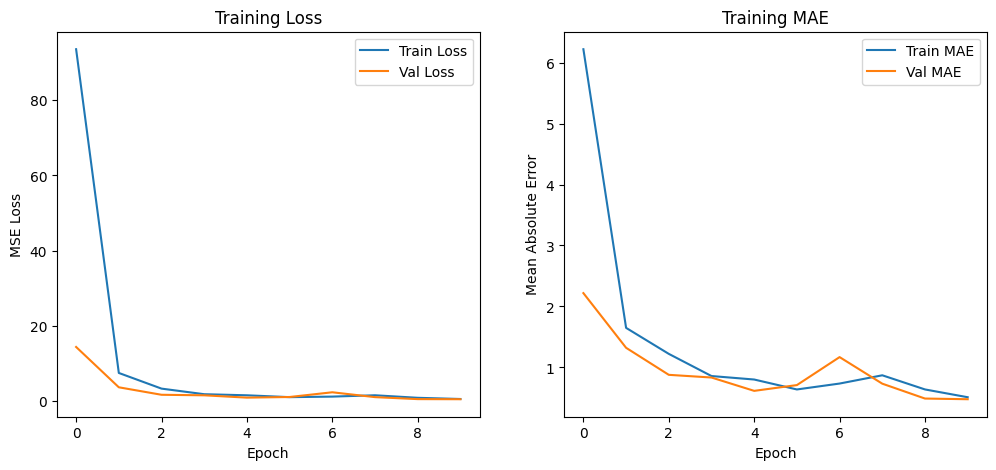

In [61]:
plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.legend()

# MAE plot
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training MAE')
plt.legend()

plt.show()

## Step 7: Evaluate Model on Test Set

We evaluate the trained model on the test set.

- `MSE` measures squared error between predicted and true coordinates.  
- `MAE` measures average absolute distance between predicted and true coordinates.  

This confirms the model's performance on unseen data.

In [63]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.4619 - mae: 0.4729
Test Loss (MSE): 0.4619
Test MAE: 0.4729


## Step 8: Visualize Predictions

We visualize a few test images with:

- **Green dot** → true pixel coordinates  
- **Red X** → predicted pixel coordinates  

This step allows a visual check that the model predicts the bright pixel accurately.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


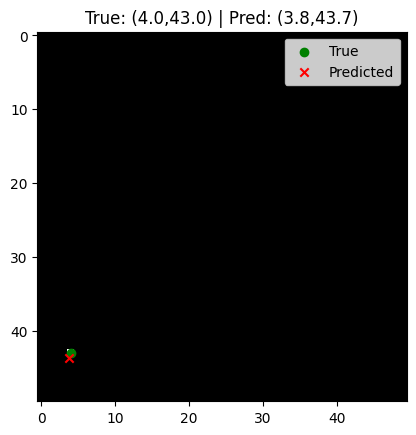

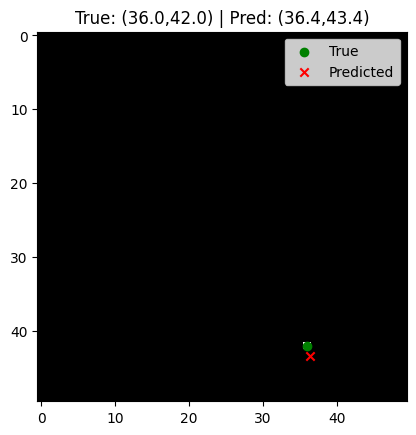

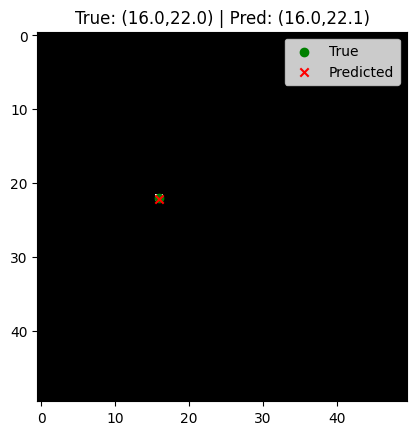

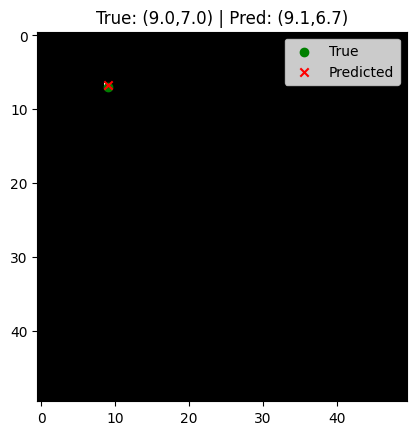

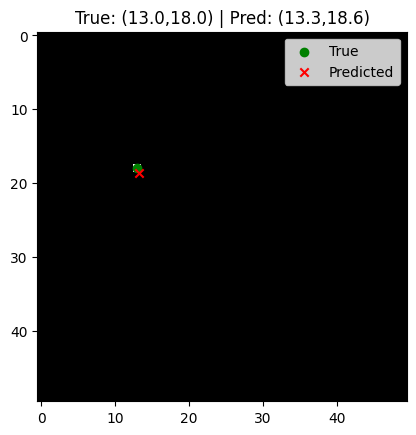

In [65]:
num_visualize = 5
preds = model.predict(X_test[:num_visualize])

for i in range(num_visualize):
    plt.imshow(X_test[i,:,:,0], cmap='gray')
    plt.scatter(y_test[i,0], y_test[i,1], color='green', label='True')
    plt.scatter(preds[i,0], preds[i,1], color='red', marker='x', label='Predicted')
    plt.title(f"True: ({y_test[i,0]:.1f},{y_test[i,1]:.1f}) | Pred: ({preds[i,0]:.1f},{preds[i,1]:.1f})")
    plt.legend()
    plt.show()

## Step 9: Conclusion

- The CNN successfully predicts coordinates of the bright pixel.  
- Synthetic data allows easy generation of a large dataset for training.  
- CNN captures spatial patterns effectively.  
- Visualization confirms predictions match the ground truth.  

This approach is simple, interpretable, and demonstrates a clear human-thinking method.

## Installation Instructions

Before running the notebook, ensure the following packages are installed:

```bash
pip install numpy matplotlib scikit-learn tensorflow